# **1. Importing laptop dataset**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Car price dataset
path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"

In [ ]:
df = pd.read_csv(path)
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


# **2. Data Cleaning**

In [ ]:
df = df.drop({"Unnamed: 0.1","Unnamed: 0"}, axis=1)
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [ ]:
df = df.drop("Price-binned", axis=1)

In [ ]:
df.info()
#No cell empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Manufacturer      238 non-null    object 
 1   Category          238 non-null    int64  
 2   GPU               238 non-null    int64  
 3   OS                238 non-null    int64  
 4   CPU_core          238 non-null    int64  
 5   Screen_Size_inch  238 non-null    float64
 6   CPU_frequency     238 non-null    float64
 7   RAM_GB            238 non-null    int64  
 8   Storage_GB_SSD    238 non-null    int64  
 9   Weight_pounds     238 non-null    float64
 10  Price             238 non-null    int64  
 11  Screen-Full_HD    238 non-null    int64  
 12  Screen-IPS_panel  238 non-null    int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 24.3+ KB


In [ ]:
df['Category'].value_counts()

Category
3    154
4     60
1     14
5      9
2      1
Name: count, dtype: int64

In [ ]:
df['GPU'].value_counts()

GPU
2    136
3     69
1     33
Name: count, dtype: int64

# **3. Exploratory Data Analysis using statitical tests & visualization**

In [ ]:
df_pp = pd.get_dummies(data=df, columns=["Manufacturer"])
df_pp.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,...,Manufacturer_Asus,Manufacturer_Dell,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Xiaomi
0,4,2,1,5,14.0,0.551724,8,256,3.52800,978,...,False,False,False,False,False,False,False,False,False,False
1,3,1,1,3,15.6,0.689655,4,256,4.85100,634,...,False,True,False,False,False,False,False,False,False,False
2,3,1,1,7,15.6,0.931034,8,256,4.85100,946,...,False,True,False,False,False,False,False,False,False,False
3,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,...,False,True,False,False,False,False,False,False,False,False
4,4,2,1,7,15.6,0.620690,8,256,4.21155,837,...,False,False,True,False,False,False,False,False,False,False


In [ ]:
df_pp = df_pp.astype(float)
df_pp.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,...,Manufacturer_Asus,Manufacturer_Dell,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Xiaomi
0,4.0,2.0,1.0,5.0,14.0,0.551724,8.0,256.0,3.52800,978.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,1.0,1.0,3.0,15.6,0.689655,4.0,256.0,4.85100,634.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,1.0,1.0,7.0,15.6,0.931034,8.0,256.0,4.85100,946.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,2.0,1.0,5.0,13.3,0.551724,8.0,128.0,2.69010,1244.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,2.0,1.0,7.0,15.6,0.620690,8.0,256.0,4.21155,837.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df['Price']
x = df.drop("Price", axis=1)

In [ ]:
df_pp.columns

Index(['Category', 'GPU', 'OS', 'CPU_core', 'Screen_Size_inch',
       'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'Weight_pounds', 'Price',
       'Screen-Full_HD', 'Screen-IPS_panel', 'Manufacturer_Acer',
       'Manufacturer_Asus', 'Manufacturer_Dell', 'Manufacturer_HP',
       'Manufacturer_Huawei', 'Manufacturer_Lenovo', 'Manufacturer_MSI',
       'Manufacturer_Razer', 'Manufacturer_Samsung', 'Manufacturer_Toshiba',
       'Manufacturer_Xiaomi'],
      dtype='object')

**3a. Correlation check using ANOVA & pearson correlation coefficient**

In [ ]:
from scipy.stats import f_oneway

In [ ]:
data = df[['Category', 'Price']]
grp_data = {i:data['Price'][data['Category']==i] for i in data['Category']}

F, p = f_oneway(grp_data[1],grp_data[2],grp_data[3],grp_data[4], grp_data[5])

if p<0.05:
    print(p)
    print("\n")
    print("Category is significant factor impacting the price")
else:
    print(p)
    print("\n")
    print("Category is not significant factor impacting the price")

5.776083670630872e-17


Category is significant factor impacting the price


In [ ]:
data = df[['GPU', 'Price']]
grp_data = {i:data['Price'][data['GPU']==i] for i in data['GPU']}

F, p = f_oneway(grp_data[1],grp_data[2],grp_data[3])

if p<0.05:
    print(p)
    print("\n")
    print("GPU is significant factor impacting the price")
else:
    print(p)
    print("\n")
    print("GPU is not significant factor impacting the price")

8.46402917540384e-06


GPU is significant factor impacting the price


In [ ]:
data = df[['OS', 'Price']]
grp_data = {i:data['Price'][data['OS']==i] for i in data['OS']}

F, p = f_oneway(grp_data[1],grp_data[2])

if p<0.05:
    print(p)
    print("\n")
    print("OS is significant factor impacting the price")
else:
    print(p)
    print("\n")
    print("OS is not significant factor impacting the price")

0.0005696642559246671


OS is significant factor impacting the price


In [ ]:
data = df[['CPU_core', 'Price']]
grp_data = {i:data['Price'][data['CPU_core']==i] for i in data['CPU_core']}

F, p = f_oneway(grp_data[5],grp_data[3], grp_data[7])

if p<0.05:
    print(p)
    print("\n")
    print("CPU core is significant factor impacting the price")
else:
    print(p)
    print("\n")
    print("CPU core is not significant factor impacting the price")

2.802998191467104e-13


CPU core is significant factor impacting the price


In [ ]:
data = df[['Screen-IPS_panel', 'Price']]
grp_data = {i:data['Price'][data['Screen-IPS_panel']==i] for i in data['Screen-IPS_panel']}

F, p = f_oneway(grp_data[1],grp_data[0])

if p<0.05:
    print(p)
    print("\n")
    print("Screen IPS panel is significant factor impacting the price")
else:
    print(p)
    print("\n")
    print("Screen IPS panel is not significant factor impacting the price")

0.7463568309776456


Screen IPS panel is not significant factor impacting the price


In [ ]:
data = df[['Screen-Full_HD', 'Price']]
grp_data = {i:data['Price'][data['Screen-Full_HD']==i] for i in data['Screen-Full_HD']}

F, p = f_oneway(grp_data[1],grp_data[0])

if p<0.05:
    print(p)
    print("\n")
    print("Screen full hd is significant factor impacting the price")
else:
    print(p)
    print("\n")
    print("Screen full hd is not significant factor impacting the price")

0.7463568309776456


Screen full hd is not significant factor impacting the price


In [ ]:
scale_data = df_pp[['CPU_frequency','Screen_Size_inch','RAM_GB','Storage_GB_SSD','Weight_pounds','Price']]
scale_data.head()

,CPU_frequency,Screen_Size_inch,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
0,0.551724,14.0,8.0,256.0,3.52800,978.0
1,0.689655,15.6,4.0,256.0,4.85100,634.0
2,0.931034,15.6,8.0,256.0,4.85100,946.0
3,0.551724,13.3,8.0,128.0,2.69010,1244.0
4,0.620690,15.6,8.0,256.0,4.21155,837.0


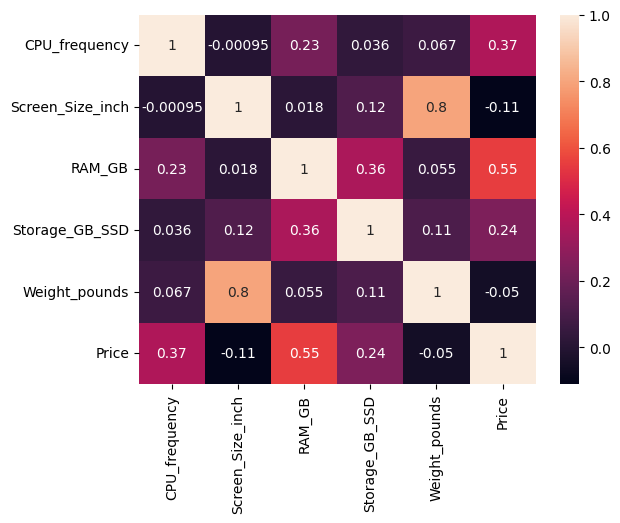

In [ ]:
# prompt: draw a correlation matrix from a dataset

import matplotlib.pyplot as plt
corr = scale_data.corr()
sns.heatmap(corr, annot=True)
plt.show()


Weight_Pounds & Price are not highly correlated. they can be ignored.
Screen size HD & IPS panel to be checked with ANOVA

Final features to be considered in the model
1. Manufacturer
2. Category
3. GPU
4. OS
5. CPU_core
6. Screen_size_inch
7. CPU_frequency
8. RAM_GB
9. Storage_GB_SSD

In [ ]:
y = df_pp["Price"]
x = df_pp.drop({'Weight_pounds','Screen-Full_HD','Screen-IPS_panel'}, axis=1)

**3b. Relationship check with Visualization**

In [ ]:
# prompt: create a function to draw a side by side box plot for visualization

import matplotlib.pyplot as plt
def plot_side_by_side_boxplots(data,x,y):

    #This function creates a side-by-side boxplot for each category in the data.

    sns.boxplot(x=x, y=y, data=data)
    plt.show()

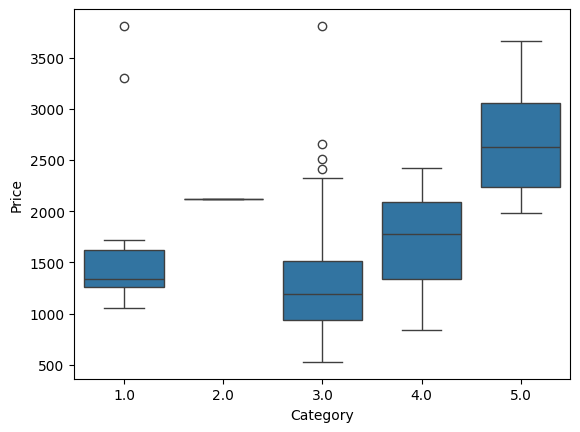

In [ ]:
# Category box plot
data = df_pp[['Category', 'Price']]
plot_side_by_side_boxplots(data, 'Category','Price')

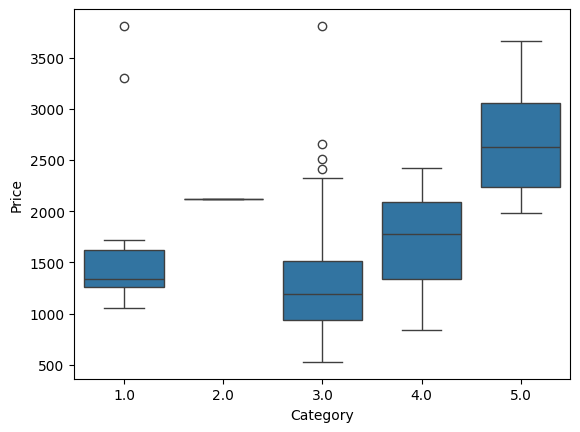

In [ ]:
data = df_pp[['Category', 'Price']]
#categories = list(data['Category'].unique())
#print(categories)
sns.boxplot(x='Category', y='Price', data=data)
plt.show()

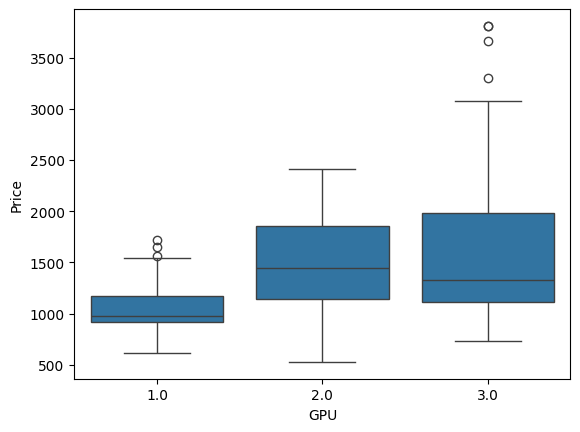

In [ ]:
# Category box plot
data = df_pp[['GPU', 'Price']]
plot_side_by_side_boxplots(data, 'GPU','Price')

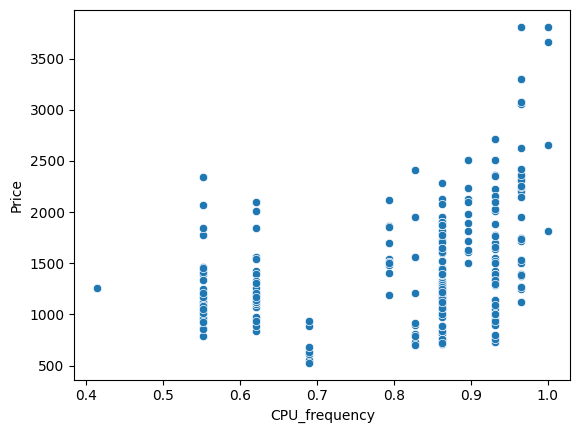

In [ ]:
data = df_pp[['CPU_frequency','Price']]
sns.scatterplot(x='CPU_frequency', y='Price', data=data)
plt.show()

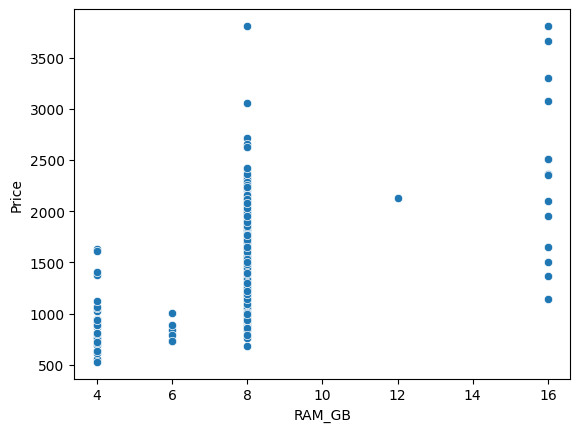

In [ ]:
data = df_pp[['RAM_GB','Price']]
sns.scatterplot(x='RAM_GB', y='Price', data=data)
plt.show()

# **4. Linear Regression Model**

**4a. Multiple linear regression**

In [ ]:
# prompt: create a linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
y = df_pp["Price"]
x = df_pp.drop({'Weight_pounds','Screen-Full_HD','Screen-IPS_panel','Price'}, axis=1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
lm = LinearRegression()
lm.fit(x_train,y_train)
y_pred = lm.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
print(mse)

129251.41541749316


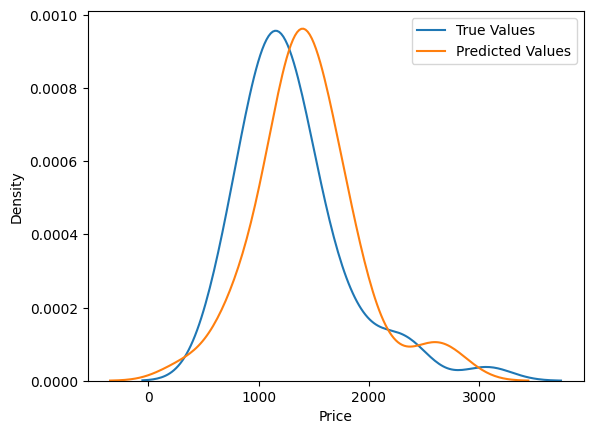

In [ ]:
ax1 = sns.kdeplot(y_test, label="True Values")
ax2 = sns.kdeplot(y_pred, label="Predicted Values")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.43916891676367553

**4b. Polynomial regression Model**

In [ ]:
#Improving with polynomial regression
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
poly = LinearRegression()
poly.fit(x_train_pr, y_train)
y_pred = poly.predict(x_test_pr)
r = r2_score(y_test, y_pred)
print(r)

-1.0630338053178571e+17


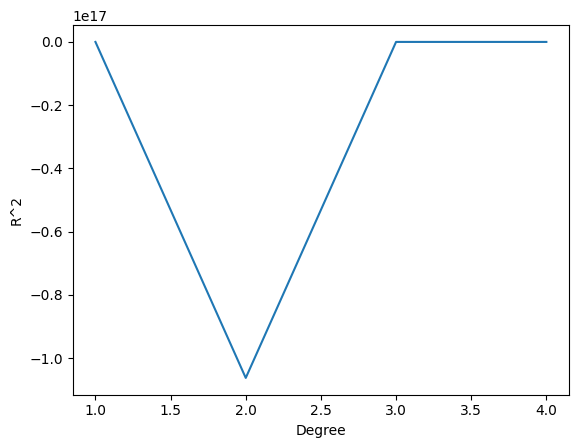

In [ ]:
# prompt: write a function to calculate r2 at different degree of polynomial

def calculate_r2_at_different_degrees(x_train, y_train,x_test,y_test, max_degree):
  """
  Calculates R^2 for polynomial regressions of different degrees.

  Args:
      x: Independent variable data.
      y: Dependent variable data.
      max_degree: Maximum degree of polynomial to consider.

  Returns:
      A list of R^2 values for each degree.
  """

  r2_values = []
  for degree in range(1, max_degree + 1):
    # Create polynomial features
    poly_features = PolynomialFeatures(degree=degree)
    x_train_poly = poly_features.fit_transform(x_train)
    x_test_poly = poly_features.fit_transform(x_test)

    # Train linear regression model
    model = LinearRegression()
    model.fit(x_train_poly, y_train)

    # Predict using the model
    y_pred = model.predict(x_test_poly)

    # Calculate R^2
    r2 = r2_score(y_test, y_pred)
    r2_values.append(r2)

  return r2_values

# Example usage

max_degree = 4
r2_values = calculate_r2_at_different_degrees(x_train, y_train,x_test,y_test, max_degree)


# Print the R^2 values
order = [1,2,3,4]
plt.plot(order, r2_values)
plt.xlabel('Degree')
plt.ylabel('R^2')
plt.show()


In [ ]:
x_train.head()

,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Manufacturer_Acer,Manufacturer_Asus,Manufacturer_Dell,Manufacturer_HP,Manufacturer_Huawei,Manufacturer_Lenovo,Manufacturer_MSI,Manufacturer_Razer,Manufacturer_Samsung,Manufacturer_Toshiba,Manufacturer_Xiaomi
184,3.0,2.0,1.0,5.0,15.6,0.827586,8.0,256.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,3.0,3.0,1.0,7.0,15.0,0.896552,16.0,256.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
194,4.0,2.0,1.0,5.0,13.3,0.862069,8.0,256.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,3.0,1.0,1.0,7.0,15.6,0.931034,8.0,256.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
227,3.0,2.0,1.0,5.0,14.0,0.793103,4.0,128.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
# prompt: write code to standardize the scale of features

from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(x_train)

# Transform the training and test data
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
lrm = LinearRegression()
lrm.fit(x_train_scaled,y_train)
y_pred = lrm.predict(x_test_scaled)
r2 = r2_score(y_test, y_pred)
print(r2)

0.4534856591150128


**4c. Linear Regression using Gridsearch & ridge regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
ridge = Ridge()
grid = GridSearchCV(ridge, parameters, cv=4)
grid.fit(x, y)
print(grid.best_params_)

{'alpha': 0.001}


In [ ]:
BestRR = grid.best_estimator_
y_hat = BestRR.predict(x_test)
#Evaluation
r2 = r2_score(y_test, y_hat)
print(r2)

0.5987065707031047


In [ ]:
# prompt: remove index from panda series

y = pd.DataFrame({'Actual Price':y_test.values.tolist(), 'Predicted Price':y_hat.round(1)})
y.head()

,Actual Price,Predicted Price
0,1498.0,1749.4
1,876.0,1349.2
2,1188.0,1188.7
3,1142.0,1384.5
4,1117.0,1265.2


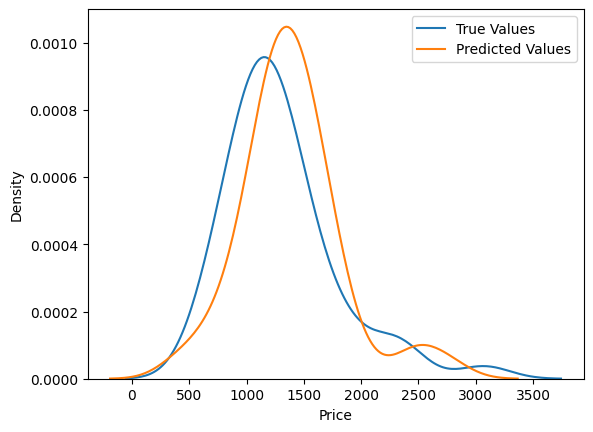

In [ ]:
# Distribution plot
ax1 = sns.kdeplot(y_test, label="True Values")
ax2 = sns.kdeplot(y_hat, label="Predicted Values")
plt.legend()
plt.show()


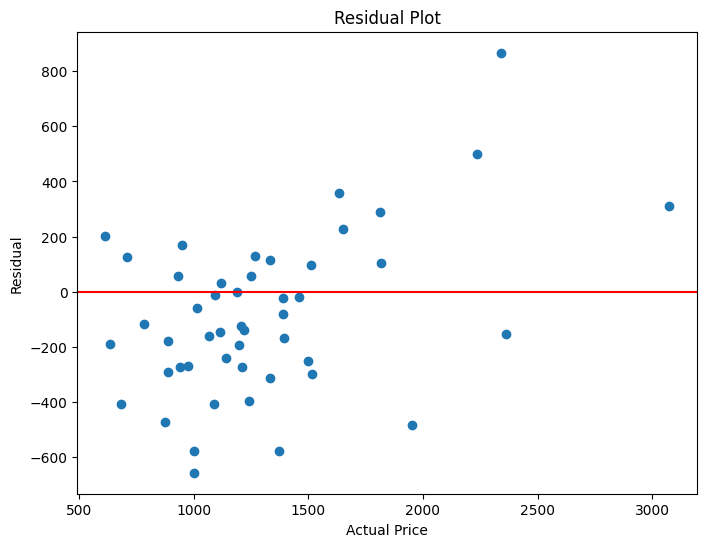

In [ ]:
# prompt: plot residual plot to check the errors

import matplotlib.pyplot as plt
import numpy as np

# Calculate the residuals
residuals = y_test - y_hat

# Plot the residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(0, color='red')
plt.xlabel('Actual Price')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()
